In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
S = 1500 #размерность матрицы    
L = 16 # длина ящика для нулевых краевых условий
dx = L/(S+2)
phix = np.pi #при построение потенциала обл определения будет сдвигаться на pi
x = np.linspace(-L/2+dx+phix, L/2-dx+phix, S) # список xi от -L/2+dx до L/2-dx
k = 1/(2*dx**2)
dx
# параметры графика
width = 8
high = 6
#h = 1, m = 1

## $\frac{U(\varphi)}{E_J}=\frac{(\varphi_x-\varphi)^2}{2l_q}+(1-\cos\varphi)$

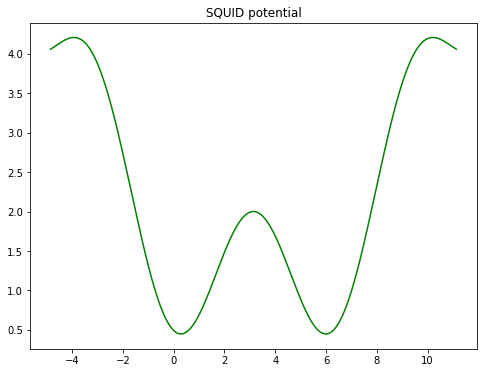

In [79]:
lq = 10
EJ = 1
def U(phi):
    return (phix - phi)**2/(2*lq) + 1 - np.cos(phi)
v = U(x)
plt.figure(figsize=(width,high))
plt.plot(x, v, color="green", label="V(x)")       
plt.title("SQUID potential")
plt.show()    
    

## Блок 1. Нахождение собственных векторов и собственных значений матрицы гамильтониана

In [80]:
# построение матрицы Гамильтона
h = np.zeros((S,S))
for i in range(S-1):
    h[i+1][i] = -1*k
    h[i][i+1] = -1*k
for i in range(S):
    h[i][i] = 2*k + v[i]
#h[S-1][S-1]
print("1й, 2й и последний элементы диагонали:", h[0][0],h[1][1],h[-1][-1])

1й, 2й и последний элементы диагонали: 8816.572155827635 8816.574214731438 8816.572155827635


In [81]:
eigvals, eigvecs = np.linalg.eigh(h)

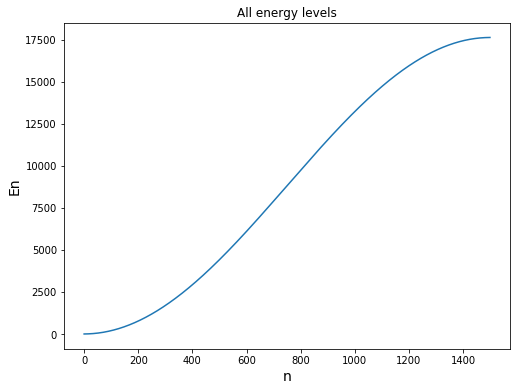

In [82]:
# построение зависимости энергии от номера уровня
# зависимость для всех уровней (необрезанная) довольно кривая
plt.figure(figsize=(width,high))
plt.plot(eigvals)
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.title("All energy levels")
plt.show()

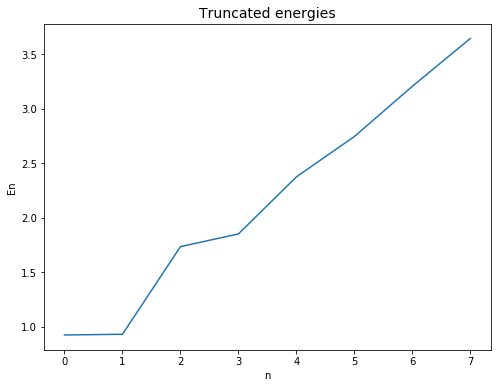

In [83]:
# анализ уровней на вырожденность
# построим первые n
n = 8
plt.figure(figsize=(width, high))
plt.plot(eigvals[:n])
#plt.plot(eigvals[:n]/eigvals[0]) #нормируем каждый уровень на первый
plt.xlabel("n")
plt.ylabel("En")
plt.title("Truncated energies",size = 14)
plt.show()
 

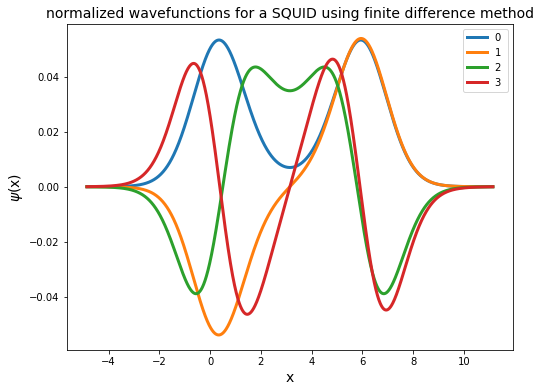

In [84]:
num = 4
plt.figure(figsize=(width, high))
for i in range(num):
    y = []
    y = np.append(y,eigvecs[:,i])
#    y = np.append(y,0)
#    y = np.insert(y,0,0)
    plt.plot(x, y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a SQUID using finite difference method',size=14)
plt.show()

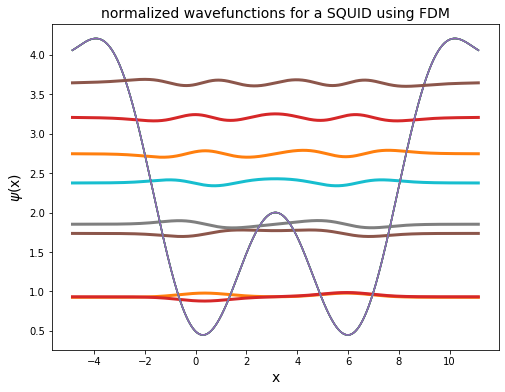

In [85]:
# волновые функции на потенциале со сдвигом на энергию
num = 8
plt.figure(figsize=(width, high))
for i in range(num):
    y = []
    y = np.append(y,eigvecs[:,i]+eigvals[i])
#    y = np.append(y,0)
#    y = np.insert(y,0,0)
    plt.plot(x, v)
    plt.plot(x, y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
#plt.legend()
plt.title('normalized wavefunctions for a SQUID using FDM',size=14)
plt.show()

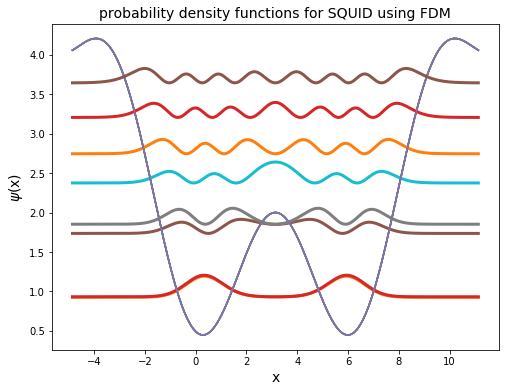

In [86]:
# построим плотность вероятности 
num = 8
plt.figure(figsize=(width, high))
for i in range(num):
    y = []
    y = np.append(y,eigvecs[:,i])
#    y = np.append(y,0)
#    y = np.insert(y,0,0)
    plt.plot(x, v)
    plt.plot(x, y**2/dx+eigvals[i],lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
#plt.legend()
plt.title('probability density functions for SQUID using FDM',size=14)
plt.show()

Выше важно не запутаться в понятиях квадрата волновой функции в точке и плотности вероятности. $\psi^2[i]$ - вероятность нахождения частицы в области $x[i]dx$. Эта вероятность через функцию плотности определяется как $\rho(x)*dx$. Поэтому при простроении плотности вероятности выше, было использовано соотношение $\rho(x)=\psi^2[i]/dx$

# Блок 3. Поиск матричных элементов


## 1. Матрица плотности
Считается, что энергетические уровни подчиняются распредеелнию Больцмана. Т.е. вероятность нахождения чатицы на уровне n: $prob_n = \frac{1}{Z} e^{-\beta E_n}$, где $Z = \sum_0^\infty e^{-\beta E_n}$  - статсумма, а $\beta = \frac{1}{kT}$.
Тогда матрица плотности находится по формуле $\rho(x_i,x_j;\beta) = \sum_n \psi_n[x_i]e^{-\beta E_n}\psi^*_n[x_j]$

## Случай большой температуры

In [87]:
N = 100 # cut off level
beta = 0.05 #1/kT
rho = np.zeros([S,S])
# в данном случае beta скорее EJ/kT. Т.е. во сколько раз энергия Дж. больше тепловой

In [88]:
for i in range(N):
    tmp = np.e**(-beta*eigvals[i])
    rho = rho + np.array([eigvecs[:,i]]).T*eigvecs[:,i]*tmp

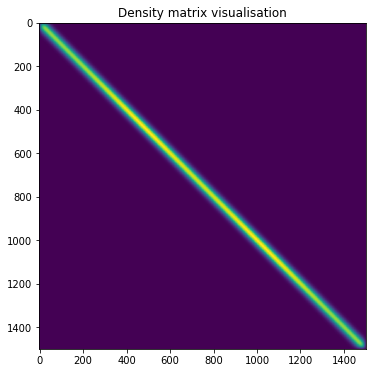

In [92]:
plt.figure(figsize=(width,high))
plt.imshow(rho)
plt.title("Density matrix visualisation")
plt.show()

## Случай маленькой температуры

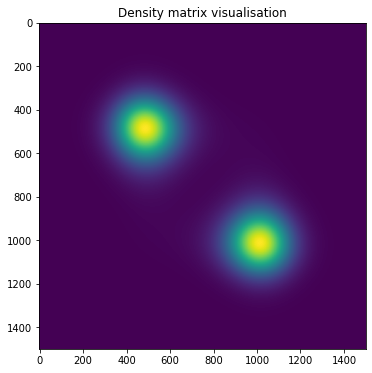

In [93]:
beta1 = 5 #1/kT
rho1 = np.zeros([S,S])
for i in range(N):
    tmp = np.e**(-beta1*eigvals[i])
    rho1 = rho1 + np.array([eigvecs[:,i]]).T*eigvecs[:,i]*tmp
plt.figure(figsize=(width,high))
plt.imshow(rho1)
plt.title("Density matrix visualisation")
plt.show()